##Sports Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/sports-classification.zip"

In [1]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
batch_size = 64
img_height = 124
img_width = 124

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10082 files belonging to 70 classes.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/valid",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 350 files belonging to 70 classes.


In [5]:
class_names = train_ds.class_names
num_classes =len(class_names)
print(class_names)

['air hockey', 'archery', 'balance beam', 'baseball', 'basketball', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'canoe slamon', 'cricket', 'croquet', 'curling', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'football', 'formula 1 racing', 'frisbee', 'giant slalom', 'golf', 'hammer throw', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'hurdles', 'ice climbing', 'jai alai', 'javelin', 'judo', 'lacrosse', 'luge', 'motorcycle racing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing', 'rollerblade racing', 'rowing', 'rugby', 'sailboat racing', 'shot put', 'ski jumping', 'skydiving', 'snow boarding', 'snowmobile racing', 'speed skating', 'sumo wrestling', 'surfing', 'swimming', 'table tennis', 'tennis', 'track bicycle', 'tug of war', 'uneven bars', 'volleyball', 'water polo', 'weightlifting', 'wheelchair basketball', 'wheelc

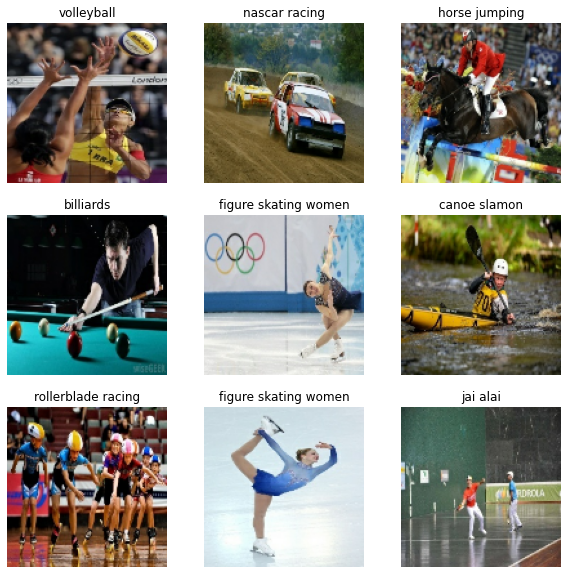

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [9]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
checkpoint = ModelCheckpoint("model_sports_classification.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose = 1)

earlystop = EarlyStopping(monitor="val_loss",
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [earlystop, checkpoint]

In [12]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callbacks,
)

Epoch 1/50
158/158 [==============================] - 17s 30ms/step - loss: 4.0168 - accuracy: 0.0484 - val_loss: 3.3285 - val_accuracy: 0.1571

Epoch 00001: val_loss improved from inf to 3.32849, saving model to model_sports_classification.h5
Epoch 2/50
158/158 [==============================] - 4s 24ms/step - loss: 3.1260 - accuracy: 0.1891 - val_loss: 3.0093 - val_accuracy: 0.2257

Epoch 00002: val_loss improved from 3.32849 to 3.00930, saving model to model_sports_classification.h5
Epoch 3/50
158/158 [==============================] - 4s 24ms/step - loss: 2.6461 - accuracy: 0.3014 - val_loss: 2.5534 - val_accuracy: 0.3457

Epoch 00003: val_loss improved from 3.00930 to 2.55342, saving model to model_sports_classification.h5
Epoch 4/50
158/158 [==============================] - 4s 24ms/step - loss: 2.2645 - accuracy: 0.3821 - val_loss: 2.3190 - val_accuracy: 0.4171

Epoch 00004: val_loss improved from 2.55342 to 2.31901, saving model to model_sports_classification.h5
Epoch 5/50
158/

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

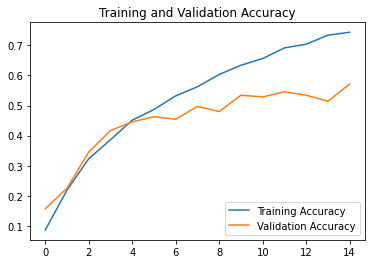

In [14]:
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

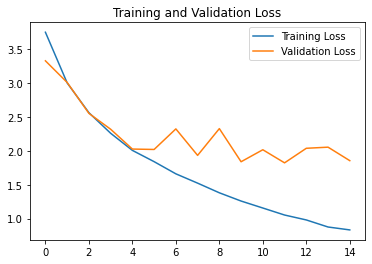

In [15]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
class_names

['air hockey',
 'archery',
 'balance beam',
 'baseball',
 'basketball',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'canoe slamon',
 'cricket',
 'croquet',
 'curling',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'football',
 'formula 1 racing',
 'frisbee',
 'giant slalom',
 'golf',
 'hammer throw',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'hurdles',
 'ice climbing',
 'jai alai',
 'javelin',
 'judo',
 'lacrosse',
 'luge',
 'motorcycle racing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole vault',
 'polo',
 'pommel horse',
 'rings',
 'rock climbing',
 'rollerblade racing',
 'rowing',
 'rugby',
 'sailboat racing',
 'shot put',
 'ski jumping',
 'skydiving',
 'snow boarding',
 'snowmobile racing',
 'speed skating',
 'sumo wrestling',
 'surfing',
 'swimming',
 'table tennis',
 'tennis',
 'track bicycle',
 'tug of war',
 'uneven bars',
 'volleyball'

This image most likely belongs to air hockey with a 99.94 percent confidence.


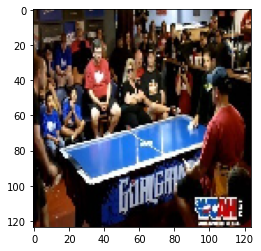

In [18]:
img = keras.preprocessing.image.load_img(
    "/content/test/air hockey/2.jpg", target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to rugby with a 25.59 percent confidence.


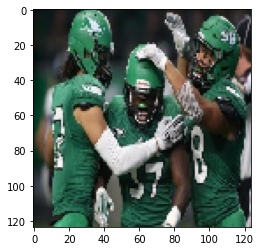

In [21]:
img = keras.preprocessing.image.load_img(
    "/content/test/football/2.jpg", target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)